In [51]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import seaborn as sns
import matplotlib.pyplot as plt

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

Untitled.ipynb
ability_ids.csv
ability_upgrades.csv
chat.csv
cluster_regions.csv
hero_names.csv
item_ids.csv
match.csv
match_outcomes.csv
objectives.csv
patch_dates.csv
player_ratings.csv
player_time.csv
players.csv
purchase_log.csv
teamfights.csv
teamfights_players.csv
test_labels.csv
test_player.csv
yasp_sample.json



In [22]:
matches = pd.read_csv("./data/match.csv", index_col=0)
match_outcomes = pd.read_csv("./data/match_outcomes.csv", index_col=0)
# player_ratings = pd.read_csv("./data/player_rating.csv", index_col=0)
players = pd.read_csv("./data/players.csv")
player_times = pd.read_csv("./data/player_time.csv")


In [34]:
matches.head()

,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
match_id,,,,,,,,,,,,
0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [32]:
matches.tail()['game_mode']

match_id
49995    22
49996    22
49997    22
49998    22
49999    22
Name: game_mode, dtype: int64

In [57]:
matches['duration_min'] = matches['duration'] / 60

41.264366770010334

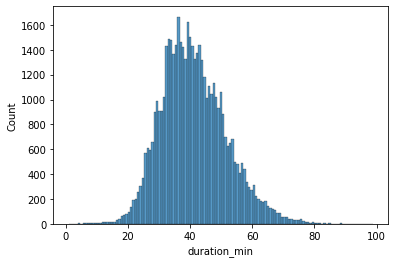

In [56]:
matches2 = matches[matches['duration_min'] <= 100]
sns.histplot(matches2['duration_min'])
matches2['duration_min'].mean()

In [58]:
matches['radiant_win']

match_id
0         True
1        False
2        False
3        False
4         True
         ...  
49995     True
49996     True
49997     True
49998     True
49999    False
Name: radiant_win, Length: 50000, dtype: bool

In [70]:
(matches2['radiant_win'].value_counts() / matches2.shape[0])

True     0.518872
False    0.481128
Name: radiant_win, dtype: float64